# Data Science And Business Analytics Internship

# The Sparks Foundation: #GRIPJULY21

# Author: Vivek Kirpan

Task 1: Prediction using Supervised ML

Problem Statement: Predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?

In [40]:
# Import all the libraries required
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

# Reading Dataset

In [41]:
# Reading data from link provided by The Sparks Foundation
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Data imported successfully")

# To find number of rows and columns
print("Shape of Data:", student_data.shape)

Data imported successfully
Shape of Data: (25, 2)


In [42]:
# Showing top 5 records from the dataset
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [43]:
# To find more information about our dataset
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [44]:
# We will check if our datasets contains any null values
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

As there are no null values in our data set, so we can procede further

# Data Visualization

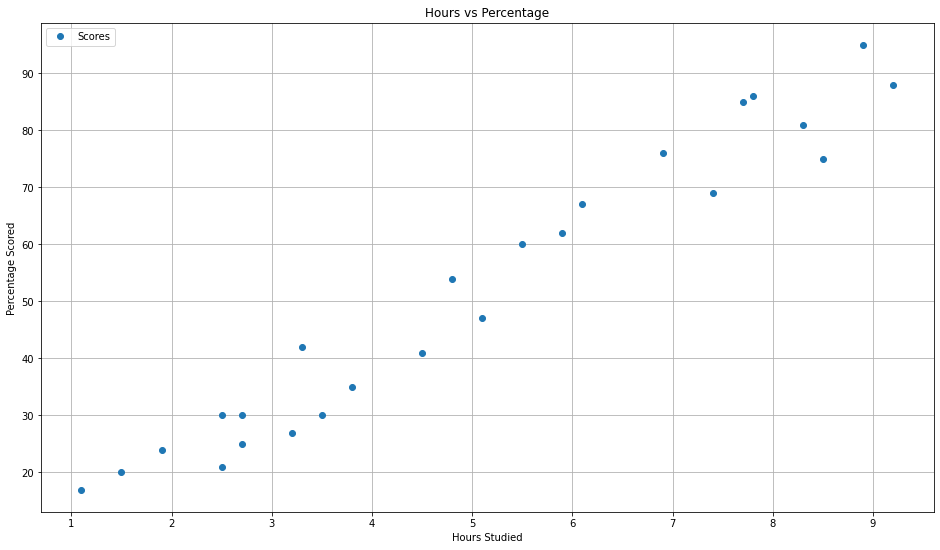

In [45]:
# Plotting the distribution of scores
plt.rcParams["figure.figsize"] = [16, 9]
student_data.plot(x="Hours", y="Scores", style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.grid()
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Data Pre-processing
The next step is to divide the data into "attributes" (input) and "labels" (output)

In [89]:
X = student_data.iloc[:, :1].values
Y_pred = student_data.iloc[:, 1:].values
print("Hours:", X)
print("Scores:", Y)

Hours: [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Scores: [[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [90]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [91]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X_train, Y_train)

print("Training Completed")

Training Completed


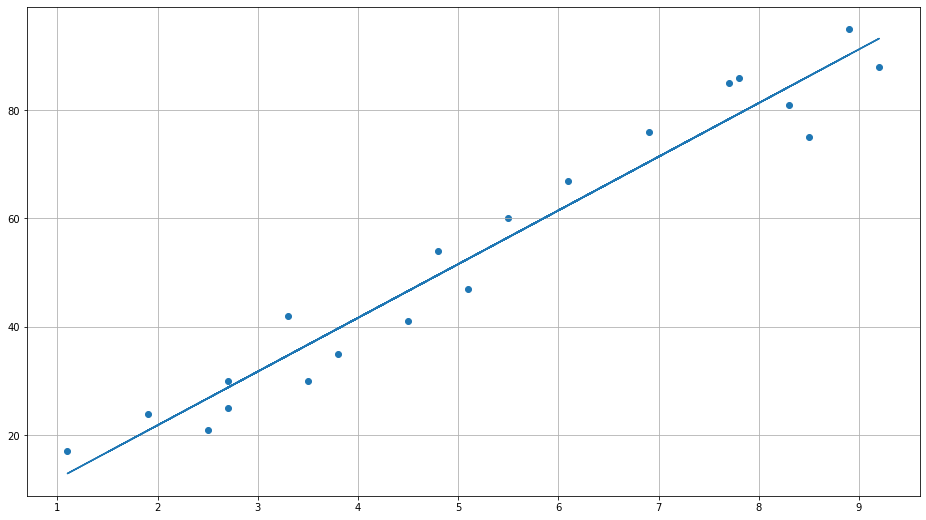

In [92]:
# Plotting the regression line
line = linReg.coef_*X + linReg.intercept_

# Plotting for training data
plt.rcParams["figure.figsize"] = [16, 9]
plt.scatter(X_train, Y_train)
plt.plot(X, line)
plt.grid()
plt.show()

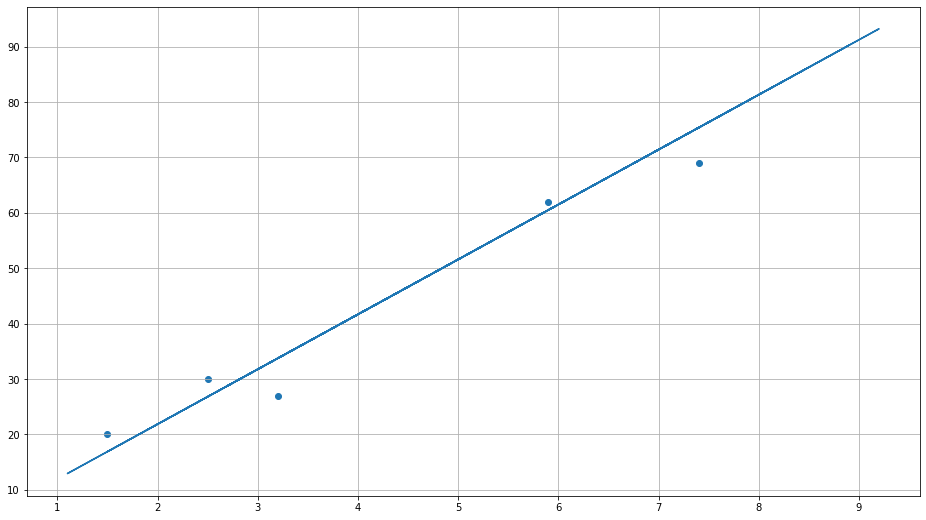

In [93]:
# Plotting for testing data
plt.rcParams["figure.figsize"] = [16, 9]
plt.scatter(X_test, Y_test)
plt.plot(X, line)
plt.grid()
plt.show()

# Making Predictions

In [94]:
print("Hours:", X_test) # Testing data - Hours
Y_pred = linReg.predict(X_test) # Predicting the score

Hours: [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [102]:
# Comparing Actual Vs Predicted data
comp = pd.DataFrame({'Actual': [Y_test], 'Predicted': [Y_pred]})
comp 

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [108]:
# Testing with own data
hours = [9.25]
own_pred = linReg.predict([hours])
print("Hours Studied:", hours)
print("Predicted Score:", own_pred[0])

Hours Studied: [9.25]
Predicted Score: [93.69173249]


Hence it can be concluded that if a student studies for 9.25 hrs his predicted score is 93.69173249

# Evaluating Model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error.

In [109]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002982
